In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer, make_blobs

# 스케일링

> 데이터가 가진 크기와 편차가 다르기 때문에 한 feature의 특징을 너무 많이 반영하거나 패턴을 찾아내는 데 문제가 발생한다.   
> 따라서 데이터 스케일링을 통해 모든 feature들의 데이터 분포나 범위를 동일하게 조정할 필요가 있다.

## 데이터 로드

make_blobs()   
- 파라미터   
    - n_samples: 표본 데이터의 수   
    - centers: 생성할 클러스터의 수 또는 중심   
    - cluster_std: 클러스터의 표준편차   
- 리턴   
    - X: (n_samples, n_features) 크기의 배열 독립 변수   
    - y: (n_samples) 크기의 배열 종속 변수   

In [2]:
X, _ = make_blobs(n_samples=200, centers=5, random_state=4, cluster_std=1.5)

In [11]:
X.shape

(200, 2)

In [12]:
# 훈련/테스트 세트 나누기
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)
X_train.shape, X_test.shape

((180, 2), (20, 2))

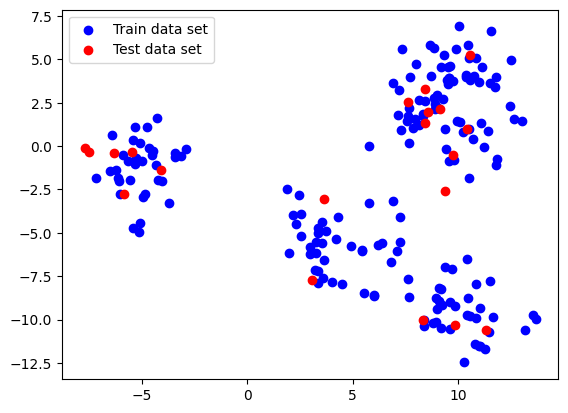

In [4]:
plt.scatter(X_train[:,0], X_train[:,1], c='b', label="Train data set")
plt.scatter(X_test[:,0], X_test[:,1], c='r', label="Test data set")

plt.legend()
plt.show()

## PowerTransformer
> 데이터의 feature별로 정규분포 형태에 가깝도록 변환

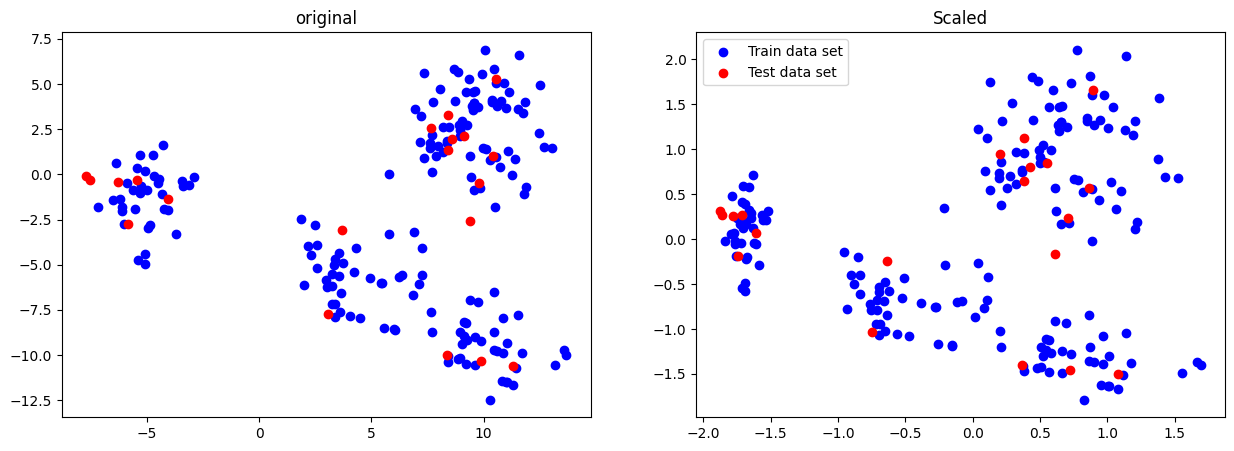

In [5]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer()

X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

fig, ax = plt.subplots(1, 2, figsize=[15,5])

ax[0].scatter(X_train[:, 0], X_train[:, 1], c='b', label="Train data set")
ax[0].scatter(X_test[:, 0], X_test[:, 1], c='r', label="Test data set")
ax[0].set_title('original')

ax[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c='b', label="Train data set")
ax[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c='r', label="Test data set")
ax[1].set_title("Scaled")

plt.legend()
plt.show()

## QuatileTransformer
> 기본적으로 1000개 분위를 사용하여 데이터를 '균등분포'시킨다.   
> Robust처럼 이상치에 민감하지 않으며, 데이터를 0~1 사이로 압축한다.

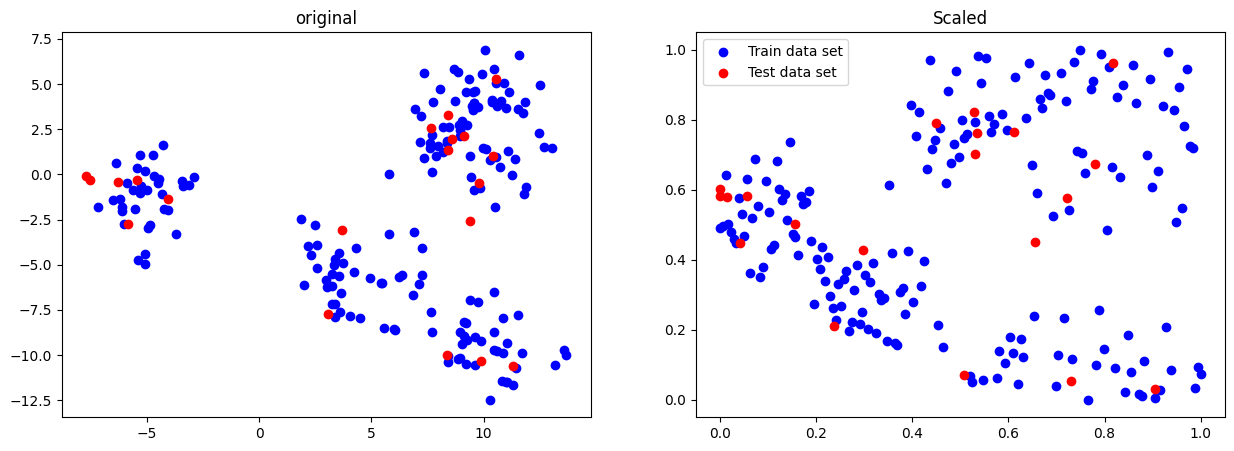

In [15]:
from sklearn.preprocessing import QuantileTransformer

scaler_q1 = QuantileTransformer(n_quantiles=len(X_train) if len(X_train) < 1000 else 1000)

X_scaled_q1 = scaler_q1.fit_transform(X_train)
X_test_scaled_q1 = scaler_q1.transform(X_test)

fig, ax = plt.subplots(1, 2, figsize=[15, 5])

ax[0].scatter(X_train[:, 0], X_train[:, 1], c='b', label="Train data set")
ax[0].scatter(X_test[:, 0], X_test[:, 1], c='r', label="Test data set")
ax[0].set_title('original')

ax[1].scatter(X_scaled_q1[:, 0], X_scaled_q1[:, 1], c='b', label="Train data set")
ax[1].scatter(X_test_scaled_q1[:, 0], X_test_scaled_q1[:, 1], c='r', label="Test data set")
ax[1].set_title('Scaled')

plt.legend()
plt.show()

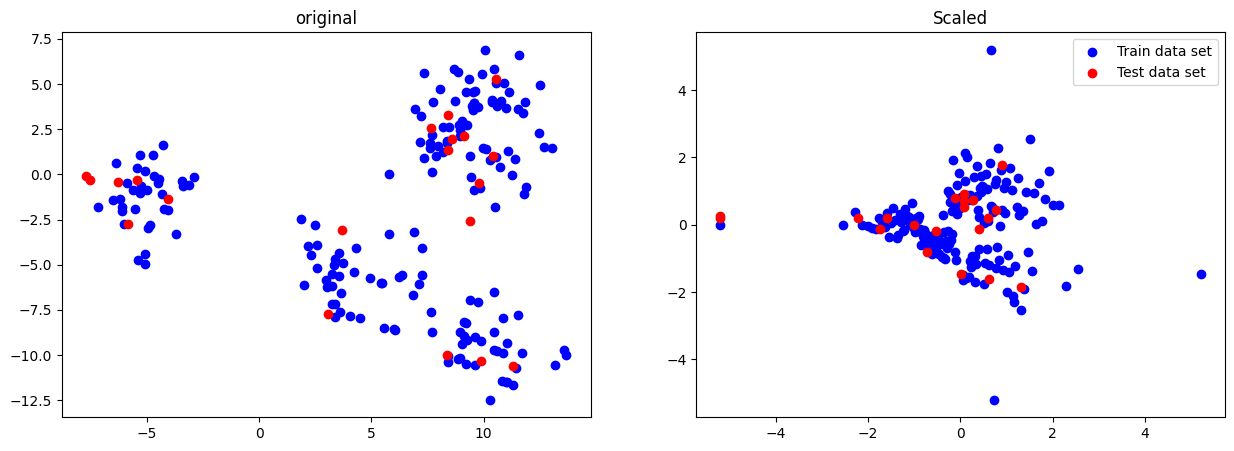

In [16]:
from sklearn.preprocessing import QuantileTransformer

scaler_q2 = QuantileTransformer(n_quantiles=len(X_train) if len(X_train) < 1000 else 1000, output_distribution='normal')

X_scaled_q2 = scaler_q2.fit_transform(X_train)
X_test_scaled_q2 = scaler_q2.transform(X_test)

fig, ax = plt.subplots(1, 2, figsize=[15, 5])

ax[0].scatter(X_train[:, 0], X_train[:, 1], c='b', label="Train data set")
ax[0].scatter(X_test[:, 0], X_test[:, 1], c='r', label="Test data set")
ax[0].set_title('original')

ax[1].scatter(X_scaled_q2[:, 0], X_scaled_q2[:, 1], c='b', label="Train data set")
ax[1].scatter(X_test_scaled_q2[:, 0], X_test_scaled_q2[:, 1], c='r', label="Test data set")
ax[1].set_title('Scaled')

plt.legend()
plt.show()

## Standard Scaler
> 데이터의 특성별로 표준정규분포 형태(평균 0, 분산 1)로 조정한다.

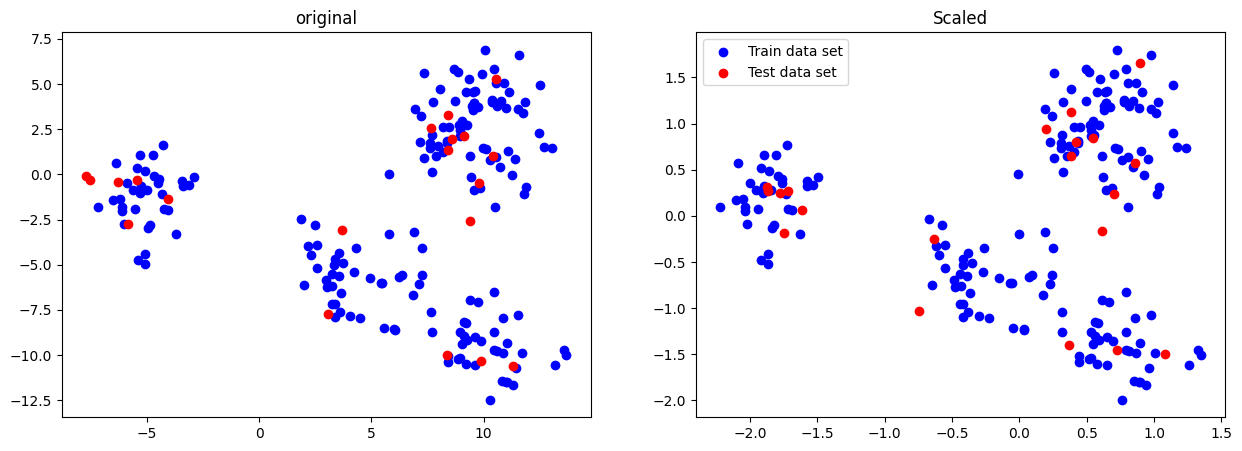

In [17]:
from sklearn.preprocessing import StandardScaler

scaler_s = StandardScaler()

X_scaled_s = scaler_s.fit_transform(X_train)
X_test_scaled_s = scaler.transform(X_test)

fig, ax = plt.subplots(1, 2, figsize=[15, 5])

ax[0].scatter(X_train[:, 0], X_train[:, 1], c='b', label="Train data set")
ax[0].scatter(X_test[:, 0], X_test[:, 1], c='r', label="Test data set")
ax[0].set_title("original")

ax[1].scatter(X_scaled_s[:, 0], X_scaled_s[:, 1], c='b', label="Train data set")
ax[1].scatter(X_test_scaled_s[:, 0], X_test_scaled_s[:, 1], c='r', label="Test data set")
ax[1].set_title("Scaled")

plt.legend()
plt.show()

## Robust Scaler
> 평균과 분산 대신 중간값(median)과 사분위값을 사용한다.   
> 중간값과 사분위값을 사용하여 <u>이상치가 있는</u> 데이터에 매우 효과적

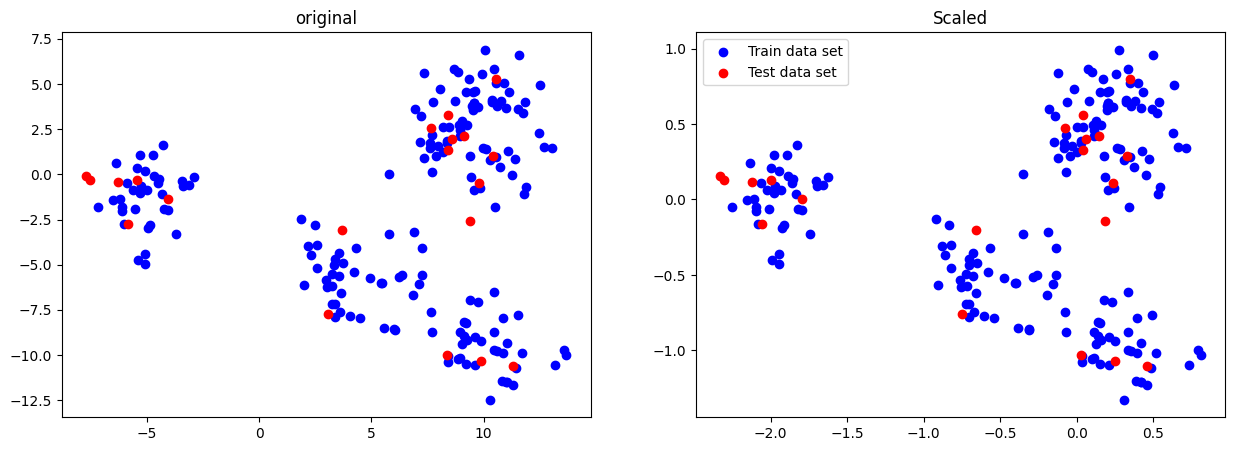

In [18]:
from sklearn.preprocessing import RobustScaler

scaler_r = RobustScaler()

X_scaled_r = scaler_r.fit_transform(X_train)
X_test_scaled_r = scaler_r.transform(X_test)

fig, ax = plt.subplots(1, 2, figsize=[15, 5])

ax[0].scatter(X_train[:, 0], X_train[:, 1], c='b', label="Train data set")
ax[0].scatter(X_test[:, 0], X_test[:, 1], c='r', label="Test data set")
ax[0].set_title("original")

ax[1].scatter(X_scaled_r[:, 0], X_scaled_r[:, 1], c='b', label="Train data set")
ax[1].scatter(X_test_scaled_r[:, 0], X_test_scaled_r[:, 1], c='r', label="Test data set")
ax[1].set_title("Scaled")

plt.legend()
plt.show()

# Standard scaler에 비해서 y축 값의 범위가 좁아졌다.

## MinMax Scaler
> 모든 feature들을 0~1 사이의 데이터 값을 갖도록 만든다.  
> 이상치에 영향을 많이 받는 방법이다.

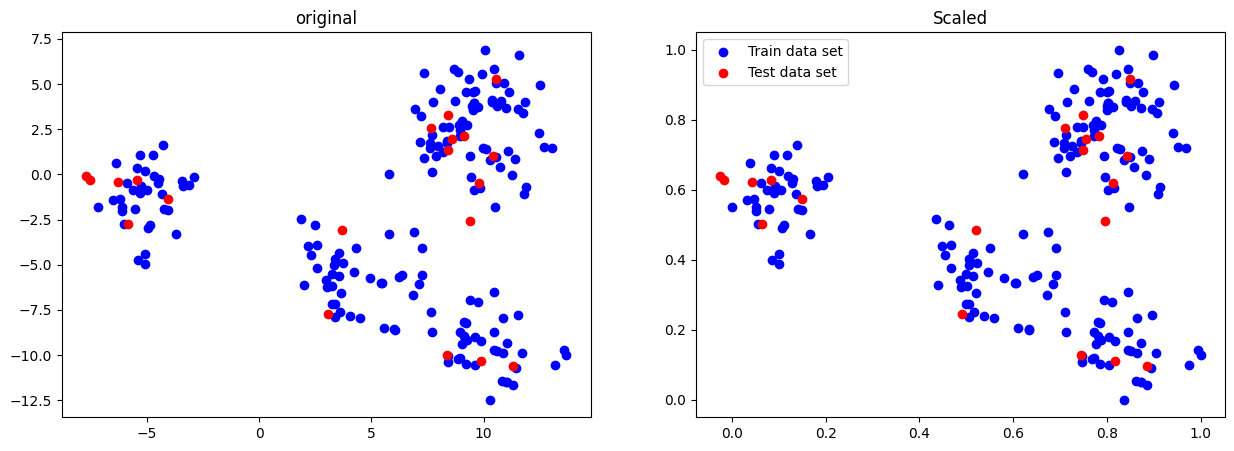

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler_mm = MinMaxScaler()

X_scaled_mm = scaler_mm.fit_transform(X_train)
X_test_scaled_mm = scaler_mm.transform(X_test)

fig, ax = plt.subplots(1, 2, figsize=[15, 5])

ax[0].scatter(X_train[:, 0], X_train[:, 1], c='b', label="Train data set")
ax[0].scatter(X_test[:, 0], X_test[:, 1], c='r', label="Test data set")
ax[0].set_title("original")

ax[1].scatter(X_scaled_mm[:, 0], X_scaled_mm[:, 1], c='b', label="Train data set")
ax[1].scatter(X_test_scaled_mm[:, 0], X_test_scaled_mm[:, 1], c='r', label="Test data set")
ax[1].set_title("Scaled")

plt.legend()
plt.show()

## MaxAbs Scaler
> 모든 feature들의 절대값이 0과 1 사이에 놓이도록 만들어준다.  
> 0을 기준으로 절대값이 가장 큰 수가 1 또는 -1의 값을 갖게 된다.  
> 이상치에 영향을 많이 받는 방법이다.

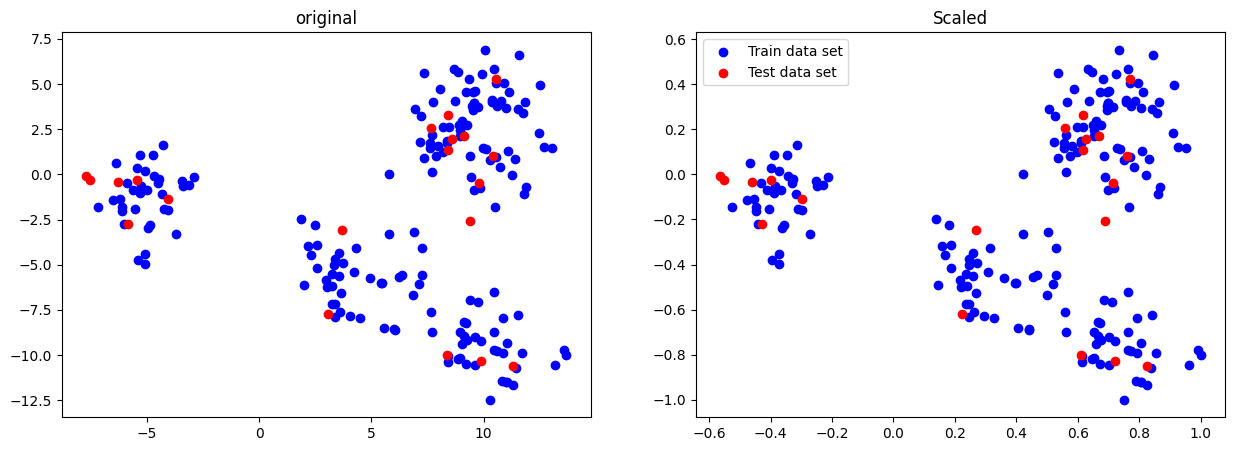

In [22]:
from sklearn.preprocessing import MaxAbsScaler

scaler_ma = MaxAbsScaler()

X_scaled_ma = scaler_ma.fit_transform(X_train)
X_test_scaled_ma = scaler_ma.transform(X_test)

fig, ax = plt.subplots(1, 2, figsize=[15, 5])

ax[0].scatter(X_train[:, 0], X_train[:, 1], c='b', label="Train data set")
ax[0].scatter(X_test[:, 0], X_test[:, 1], c='r', label="Test data set")
ax[0].set_title("original")

ax[1].scatter(X_scaled_ma[:, 0], X_scaled_ma[:, 1], c='b', label="Train data set")
ax[1].scatter(X_test_scaled_ma[:, 0], X_test_scaled_ma[:, 1], c='r', label="Test data set")
ax[1].set_title("Scaled")

plt.legend()
plt.show()

# 예제

In [23]:
results = []

In [24]:
cancer = load_breast_cancer()

cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [44]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [45]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## 모델 학습

### No scaler

In [125]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=3)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
no_scaler_score = round(dtc.score(X_test, y_test), 4)
print('모델의 정확도 :', no_scaler_score)

모델의 정확도 : 0.9035


In [53]:
X_train.shape, 455*30

((455, 30), 13650)

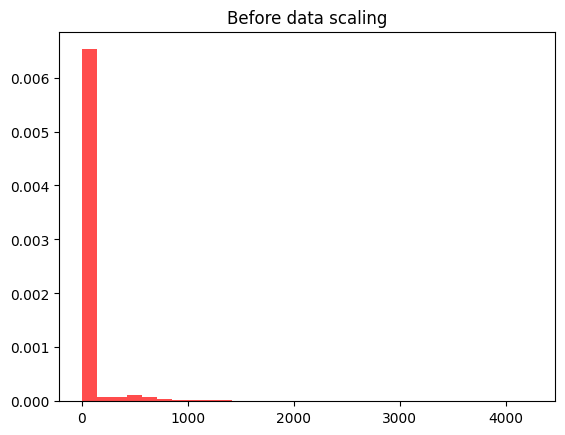

In [55]:
X_train_data = X_train.reshape(X_train.shape[0]*X_train.shape[1], 1)

plt.hist(X_train_data, bins=30, color='red', alpha=0.7, density=True)
plt.title('Before data scaling')
plt.show()

### PowerTransformer()

In [113]:
from sklearn.preprocessing import PowerTransformer

ptf = PowerTransformer()
ptf.fit(X_train)
X_train_scaled_ptf = ptf.transform(X_train)
X_test_scaled_ptf = ptf.transform(X_test)

dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled_ptf, y_train)

print(f"PowerTransformer 정확도: {round(dtc.score(X_test_scaled_ptf, y_test), 4)} / No scaler 정확도: {no_scaler_score}")

PowerTransformer 정확도: 0.9211 / No scaler 정확도: 0.9035


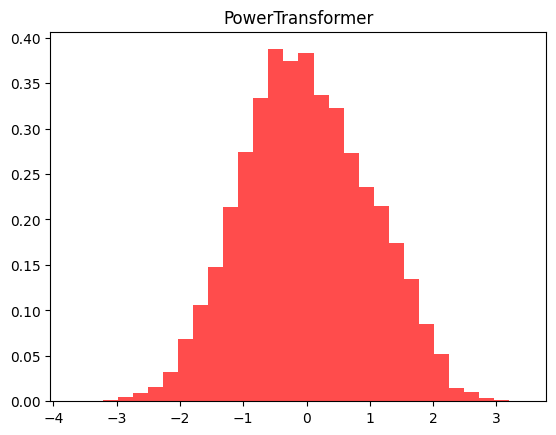

In [57]:
X_train_scaled_ptf_ss = X_train_scaled_ptf.reshape(13650, 1)

plt.hist(X_train_scaled_ptf_ss, bins=30, color='red', alpha=0.7, density=True)
plt.title("PowerTransformer")
plt.show()

### QuantileTransformer()

In [147]:
from sklearn.preprocessing import QuantileTransformer

qtf = QuantileTransformer(n_quantiles=len(X_train))
qtf.fit(X_train)
X_train_scaled_qtf = qtf.transform(X_train)
X_test_scaled_qtf = qtf.transform(X_test)

dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled_qtf, y_train)

print(f"QuantileTransformer 정확도: {round(dtc.score(X_test_scaled_qtf, y_test), 4)} / No Scaler 정확도 : {no_scaler_score}")

QuantileTransformer 정확도: 0.8684 / No Scaler 정확도 : 0.9035


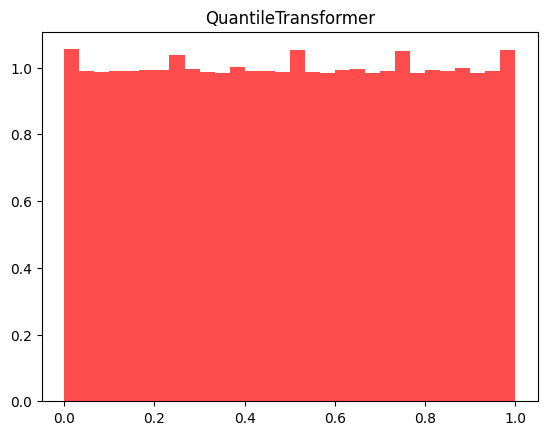

In [148]:
X_train_scaled_qtf_ss = X_train_scaled_qtf.reshape(13650, 1)

plt.hist(X_train_scaled_qtf_ss, bins=30, color='red', alpha=0.7, density=True)
plt.title("QuantileTransformer")
plt.show()

In [161]:
qtf_n = QuantileTransformer(n_quantiles=len(X_train), output_distribution="normal")
qtf_n.fit(X_train)
X_train_scaled_qtf_n = qtf_n.transform(X_train)
X_test_scaled_qtf_n = qtf_n.transform(X_test)

dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled_qtf_n, y_train)

print(f"QuantileTransformer 정확도: {round(dtc.score(X_test_scaled_qtf_n, y_test), 4)} / No Scaler 정확도 : {no_scaler_score}")

QuantileTransformer 정확도: 0.9035 / No Scaler 정확도 : 0.9035


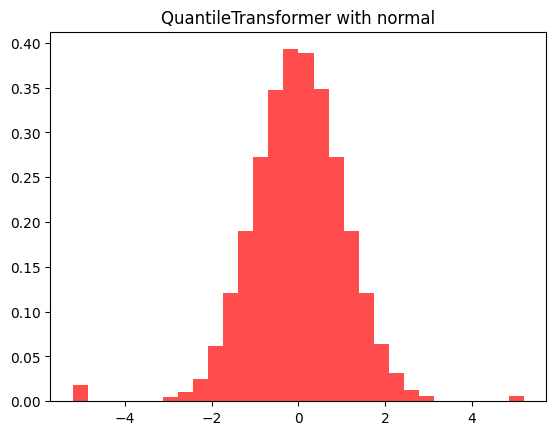

In [162]:
X_train_scaled_qtf_n_ss = X_train_scaled_qtf_n.reshape(13650, 1)

plt.hist(X_train_scaled_qtf_n_ss, bins=30, color='red', alpha=0.7, density=True)
plt.title("QuantileTransformer with normal")
plt.show()

### StandardScaler()

In [179]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train)
X_train_scaled_std = std.transform(X_train)
X_test_scaled_std = std.transform(X_test)

dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled_std, y_train)

print(f"StandardScaler 정확도: {round(dtc.score(X_test_scaled_std, y_test), 4)} / No Scaler 정확도: {no_scaler_score}")

StandardScaler 정확도: 0.9035 / No Scaler 정확도: 0.9035


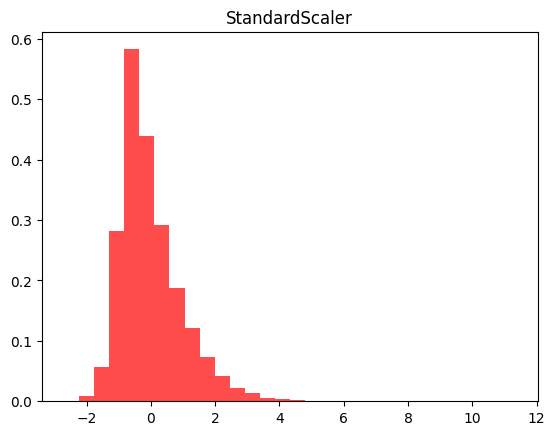

In [180]:
X_train_scaled_std_ss = X_train_scaled_std.reshape(13650, 1)

plt.hist(X_train_scaled_std_ss, bins=30, color="red", alpha=0.7, density=True)
plt.title("StandardScaler")
plt.show()

### RobustScaler()

In [258]:
from sklearn.preprocessing import RobustScaler

rbs = RobustScaler()
rbs.fit(X_train)
X_train_scaled_rbs = rbs.transform(X_train)
X_test_scaled_rbs = rbs.transform(X_test)

dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled_rbs, y_train)

print(f"RobustScaler 정확도: {round(dtc.score(X_test_scaled_rbs, y_test), 4)} / No Scaler 정확도: {no_scaler_score}")

RobustScaler 정확도: 0.9123 / No Scaler 정확도: 0.9035


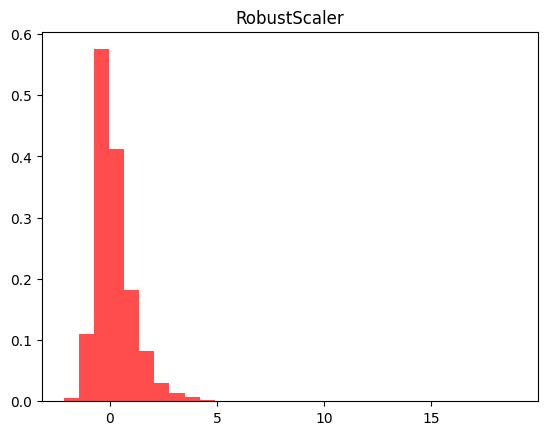

In [259]:
X_train_scaled_rbs_ss = X_train_scaled_rbs.reshape(13650, 1)

plt.hist(X_train_scaled_rbs_ss, bins=30, color="red", alpha=0.7, density=True)
plt.title("RobustScaler")
plt.show()

### MinMaxScaler()

In [309]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)
X_train_scaled_mms = mms.transform(X_train)
X_test_scaled_mms = mms.transform(X_test)

dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled_mms, y_train)

print(f"MaxAbsScaler 정확도: {round(dtc.score(X_test_scaled_mms, y_test), 4)} / No Scaler 정확도: {no_scaler_score}")

MaxAbsScaler 정확도: 0.8947 / No Scaler 정확도: 0.9035


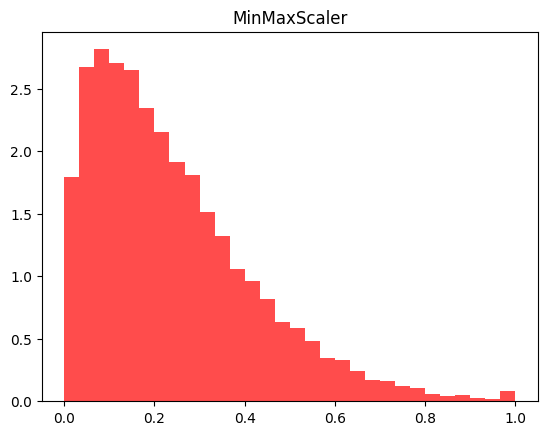

In [284]:
X_train_scaled_mms_ss = X_train_scaled_mms.reshape(13650, 1)

plt.hist(X_train_scaled_mms_ss, bins=30, color="red", alpha=0.7, density=True)
plt.title("MinMaxScaler")
plt.show()

### MaxAbsScaler()

In [281]:
from sklearn.preprocessing import MaxAbsScaler

mas = MaxAbsScaler()
mas.fit(X_train)
X_train_scaled_mas = mas.transform(X_train)
X_test_scaled_mas = mas.transform(X_test)

dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled_mas, y_train)

print(f"MaxAbsScaler 정확도: {round(dtc.score(X_test_scaled_mas, y_test), 4)} / No Scaler 정확도: {no_scaler_score}")

MaxAbsScaler 정확도: 0.8947 / No Scaler 정확도: 0.9035


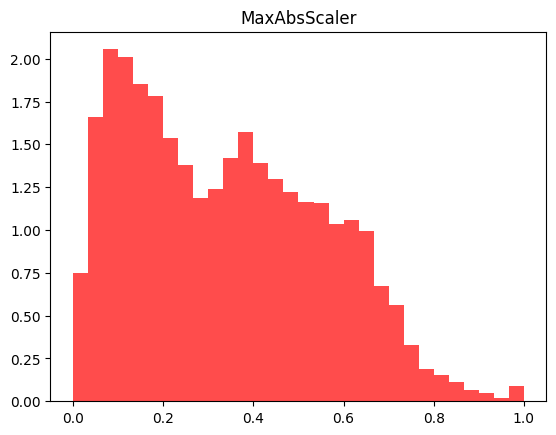

In [282]:
X_train_scaled_mas_ss = X_train_scaled_mas.reshape(13650, 1)

plt.hist(X_train_scaled_mas_ss, bins=30, color= 'red', alpha = 0.7, density = True)
plt.title('MaxAbsScaler')
plt.show()

2